# Trendet e blerjeve të konsumatorëve 

Ky dataset trajton industrinë e softuerit, duke përfshirë zhvillimin, mirëmbajtjen dhe publikimin e softuerit. Industria IT kontribuon ndjeshëm në bizense dhe ka një numër të madh të punonjësve. Poashtu, trajtohet ndikimi i inteligjencës artificiale dhe automatizimit në këtë sektor.

## Libraritë e përdorura

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier, Pool
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Metodat ndihmëse

In [3]:
# Funksioni për të hedhur një vështrim në rreshtat e parë të dataset-it.
def printo_datasetin(text, df):
    print("\n" + text + ":")
    display(df.head())

## Leximi i dataset-it

In [4]:
# Leximi i dataset-it
df = pd.read_csv("./files/Salary_Dataset_with_Extra_Features.csv")
new_df = pd.read_csv("./files/Preprocessed_Salary_Dataset_with_Extra_Features.csv")

## Kualiteti i të dhënave 

- Struktura e bazës së të dhënave

In [12]:
# Shfaqja e dataseti-it
printo_datasetin("Dataset-i", df)


Dataset-i:


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


- Njohuri mbi llojet e të dhënave

In [13]:
# Për të fituar njohuri mbi llojet e të dhënave ekzekutojmë këtë komandë:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


- Kontrollimi i vlerave null

In [16]:
# Komanda për kontrollimin e vlerave null:
df.isnull().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

- Zevëndësimi i vlerave nul

In [6]:
# Fshirja e rreshtave me vlera null në kolonat me vlera null
new_df = new_df.dropna(subset=['Company Name'])

# Shfaqja e dataseti-it të modifikuar
print(new_df.isnull().sum())

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64


- Kërkimi i duplikatëve

In [19]:
# Komanda për kërkimin e duplikateve dhe shfaqja e rezultatit
print("Duplikatet: " + str(new_df.duplicated().sum()))

Duplikatet: 0


## Outliers

<Axes: xlabel='Salary'>

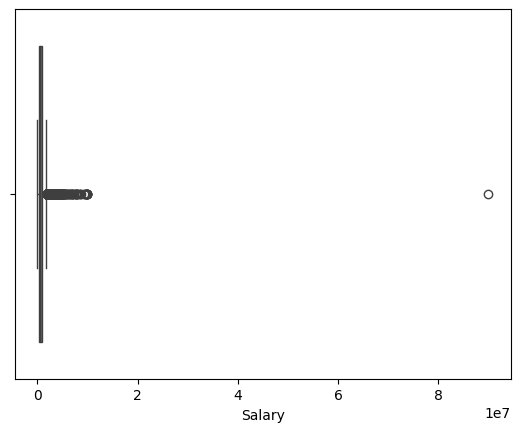

In [23]:
# Përdorimi i paketës seaborn për të paraqitur Outliers në kolonën mosha 
sns.boxplot(df['Salary'], orient='h')

- Largimi i Outliers

In [7]:
# -----------  Largimi i Outliers me metodën Z-Score -----------

# Gjetja e limiteve
upper_limit = df['Salary'].mean() + 3*df['Salary'].std()
lower_limit = df['Salary'].mean() - 3*df['Salary'].std()
print('Limiti i sipërm:', upper_limit)
print('Limiti i poshtëm:', lower_limit)

Limiti i sipërm: 3348584.2522714133
Limiti i poshtëm: -1957809.8297856865


In [8]:
# -----------  Gjetja e Outliers -----------

df.loc[(df['Salary'] > upper_limit) | (df['Salary'] < lower_limit)]

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
211,4.4,FP Tech Science,Android Developer,7100000,1,Bangalore,Full Time,Android
320,4.1,CONZUMEX INDUSTRIES,Android Developer,6900000,1,Bangalore,Full Time,Android
679,4.4,ShareChat,Senior Android Developer,3900000,1,Bangalore,Full Time,Android
734,4.0,Borqs,Senior Android Developer,3600000,1,Bangalore,Full Time,Android
744,4.0,Meesho,Senior Android Developer,3700000,1,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
20040,3.8,Sheetal Kumar & Associates,Test Engineer,5200000,1,Hyderabad,Full Time,Testing
20066,3.9,ACSESTECH,Test Engineer,4300000,1,Hyderabad,Full Time,Testing
20170,3.9,KH TEC,Test Engineer - Intern,6600000,1,Hyderabad,Intern,Testing
21130,4.3,Graduate Student,Test Engineer,3400000,1,Bangalore,Full Time,Testing


In [9]:
# -----------  Largimi i të dhënave që janë paraqitur si Outliers -----------

new_df = df.loc[(df['Salary'] <= upper_limit) & (df['Salary'] >= lower_limit)].copy()

print('Para largimit të Outliers:', len(df))
print('Pas largimit të Outliers:',len(new_df))
print('Outliers:', len(df)-len(new_df))

Para largimit të Outliers: 22770
Pas largimit të Outliers: 22604
Outliers: 166


<AxesSubplot:>

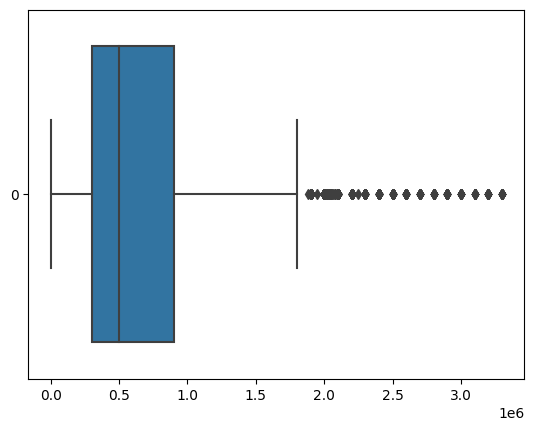

In [10]:
# -----------  Paraqitja e dataset-it pa Outliers -----------
new_df.to_csv("./files/Preprocessed_Salary_Dataset_with_Extra_Features.csv", index=False)
sns.boxplot(new_df['Salary'], orient='h')

## Skewness data

In [42]:
# Metoda për paraqitjen Skewness data

def skewness(dataFrameWithColumn):
    data = np.array(dataFrameWithColumn)

    # Llogarit mesataren dhe median
    mean = np.mean(data)
    median = np.median(data)

    # Llogarit modën dhe numrin e saj
    mode_res = stats.mode(data)

    # Marrë modën dhe vlerën e saj
    mode = mode_res.mode.item()  # Konverto skalarin e NumPy në skalar të Python
    count = mode_res.count.item()

    # Vizualizo shpërndarjen dhe shëno mesataren, median dhe modën
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, color="blue", bins=30)
    plt.axvline(mean, color='red', linestyle='--', label=f'Mesatarja: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Mediana: {median:.2f}')
    plt.axvline(mode, color='purple', linestyle='-', label=f'Moda: {mode:.2f}')

    plt.legend()
    plt.title('Histogram me Mesatare, Mediane, dhe Modë')
    plt.xlabel('Vlerat e të dhënave')
    plt.ylabel('Frekuenca')
    plt.show()


- Skewness data me dataset origjinal

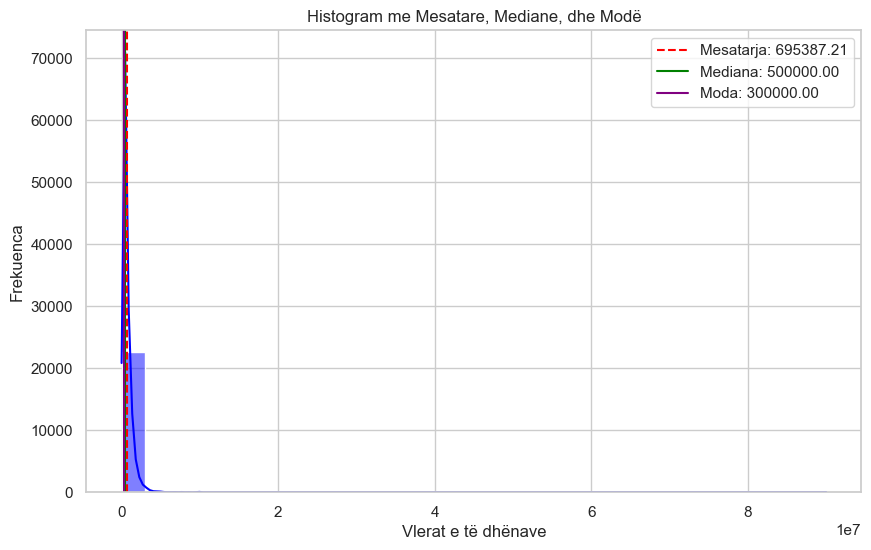

In [43]:
# Thirrja e funksionit skewness për të analizuar shpërndarjen e moshave në DataFrame origjinal
# Kjo do të krijojë një histogram që paraqet shpërndarjen e moshave dhe do të shfaqë mesataren, median dhe modën e moshave
skewness(df['Salary'])

- Skewness data pas largimit të Outliers

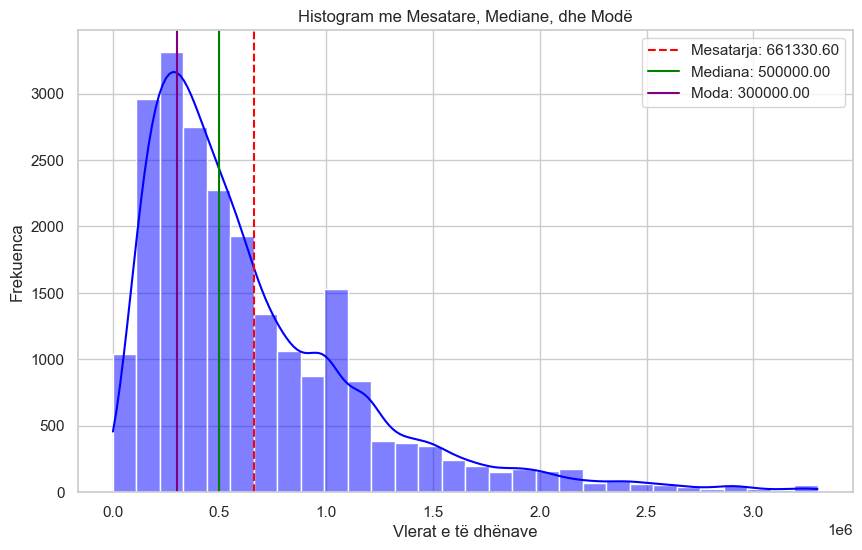

In [44]:
# Thirrja e funksionit skewness për të analizuar shpërndarjen e moshave në DataFrame pas largimit të Outliers
# Kjo do të krijojë një histogram që paraqet shpërndarjen e moshave dhe do të shfaqë mesataren, median dhe modën e moshave
skewness(new_df['Salary'])

## KMeans algoritmin

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Number of anomalies detected: 4942


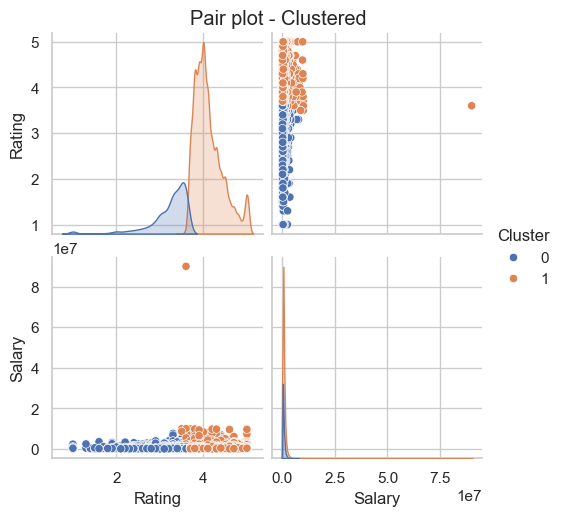

In [51]:
# Handle missing values (if any)
df.dropna(inplace=True)

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Company Name', 'Job Title', 'Location', 'Employment Status', 'Job Roles']
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Select columns for outlier detection
columns_for_outliers = ['Rating', 'Salary']  # Update as needed

# Standardize the selected columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[columns_for_outliers])

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_

# Determine the main cluster and outliers
main_cluster = np.bincount(labels).argmax()
outlier_indices = np.where(labels != main_cluster)[0]

# Determine why they are outliers based on distance from the centroid
centroid = kmeans.cluster_centers_[main_cluster]
distances = np.linalg.norm(data_scaled - centroid, axis=1)
outlier_reasons = distances[outlier_indices]

# Create an outlier information DataFrame
outliers_info = pd.DataFrame({
    "Index": outlier_indices,
    "Outlier_Distances": outlier_reasons
})
for col in columns_for_outliers:
    outliers_info[col] = df.loc[outlier_indices, col]

# Printing the number of detected anomalies
num_anomalies = len(outlier_indices)
print(f"Number of anomalies detected: {num_anomalies}")

# Deleting the outliers
data_cleaned = df.drop(index=outlier_indices)

# Add the cluster labels to your data for visualization
df['Cluster'] = labels
data_cleaned['Cluster'] = np.delete(labels, outlier_indices)

# Visualize with pair plots
sns.pairplot(df, vars=columns_for_outliers, hue='Cluster')
plt.suptitle("Pair plot - Clustered", y=1.02)
plt.show()

## Saktësia

In [53]:
new_df=pd.read_csv("./files/Preprocessed_Salary_Dataset_with_Extra_Features.csv")

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' and column != 'Job Title': 
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Encode the target variable
target_encoder = LabelEncoder()
df['Job Title'] = target_encoder.fit_transform(df['Job Title'])

# Define features and target variable
X = df.drop(['Job Title'], axis=1)
y = df['Job Title']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.4606938954765042


## Algoritmi LightGBM

C:\Users\Blerona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\lightgbm\engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Accuracy: 0.075204600752046


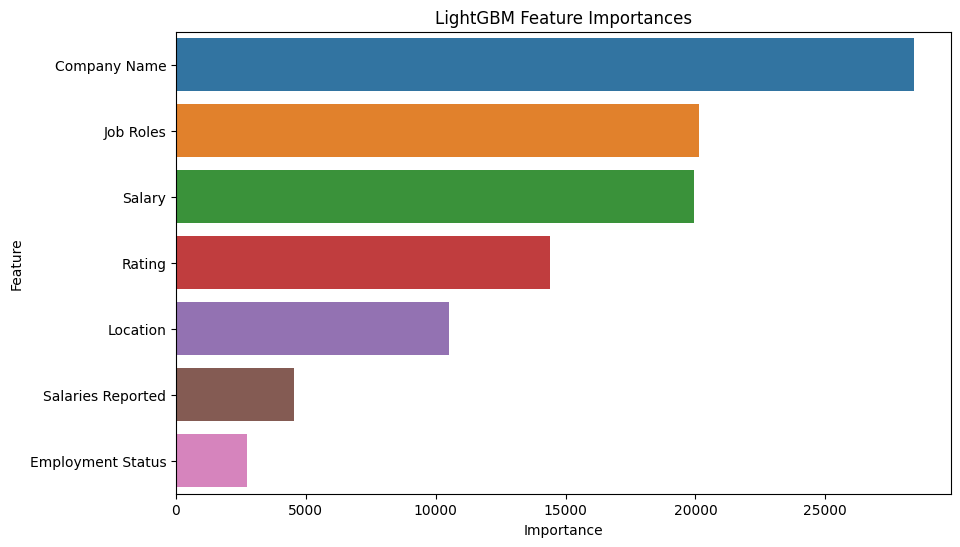

In [11]:
# Encode categorical variables
label_encoders = {}
for column in new_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    new_df[column] = label_encoders[column].fit_transform(new_df[column])

# Define features and target variable
X = new_df.drop('Job Title', axis=1)  # Assuming 'Job Title' as the target variable
y = new_df['Job Title']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Define parameters
params = {
    'objective': 'multiclass',
    'num_class': len(y.unique()),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_child_samples': 20,
    'max_bin': 255,
    'subsample': 1,
    'subsample_freq': 1,
    'colsample_bytree': 1,
    'min_child_weight': 0.001,
    'min_split_gain': 0.0,
    'n_estimators': 100,
    'verbose': -1
}

# Train the model
gbm = lgb.train(params, train_data, num_boost_round=100)

# Predict on test data
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# Convert probabilities to predicted class
y_pred = [np.argmax(line) for line in y_pred]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Get feature importances
feature_importances = gbm.feature_importance()
feature_names = X_train.columns

# Create a DataFrame for visualization
df_feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_feature_importances)
plt.title('LightGBM Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Algoritmi XGBoost

Accuracy: 0.32514930325149305


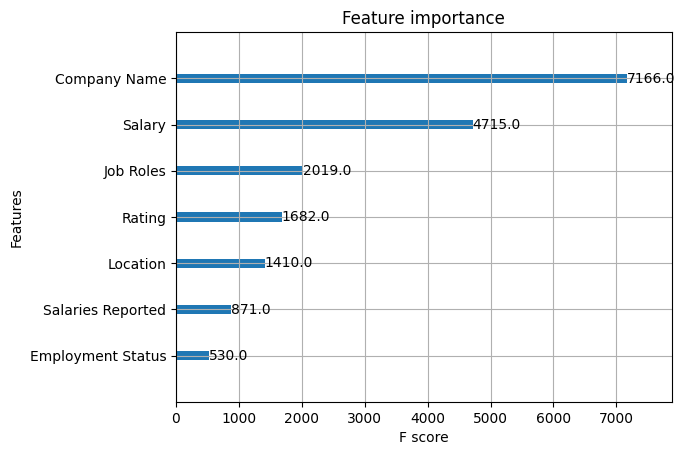

In [14]:
# Encode categorical variables
label_encoders = {}
for column in new_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    new_df[column] = label_encoders[column].fit_transform(new_df[column])

# Define features and target variable
X = new_df.drop('Job Title', axis=1)  # Replace 'Job Title' with your target variable
y = new_df['Job Title']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost data matrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specify parameters via map
param = {'max_depth': 3, 'eta': 1, 'objective': 'multi:softmax', 'num_class': len(y.unique())}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

# Make prediction
preds = bst.predict(dtest)
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy}")

# Plot feature importance
xgb.plot_importance(bst)
plt.rcParams['figure.figsize'] = [12, 8]
plt.show()


## Algoritmi CatBoost

0:	learn: 30.3585571	test: 30.2854883	best: 30.2854883 (0)	total: 922ms	remaining: 1m 31s
1:	learn: 662.9140574	test: 662.9619340	best: 30.2854883 (0)	total: 1.72s	remaining: 1m 24s
2:	learn: 1095.9808701	test: 1096.1062040	best: 30.2854883 (0)	total: 2.67s	remaining: 1m 26s
3:	learn: 1439.1566858	test: 1438.9617198	best: 30.2854883 (0)	total: 3.52s	remaining: 1m 24s
4:	learn: 1414.4580577	test: 1413.4793370	best: 30.2854883 (0)	total: 5.62s	remaining: 1m 46s
5:	learn: 1486.7545737	test: 1484.8957169	best: 30.2854883 (0)	total: 6.54s	remaining: 1m 42s
6:	learn: 1523.7244016	test: 1521.6614112	best: 30.2854883 (0)	total: 7.33s	remaining: 1m 37s
7:	learn: 1402.5790546	test: 1413.6171702	best: 30.2854883 (0)	total: 8.24s	remaining: 1m 34s
8:	learn: 1256.3468179	test: 1266.7394498	best: 30.2854883 (0)	total: 10.3s	remaining: 1m 44s
9:	learn: 1111.2760521	test: 1121.9059718	best: 30.2854883 (0)	total: 11.5s	remaining: 1m 43s
10:	learn: 1233.4430224	test: 1243.1342960	best: 30.2854883 (0)	to

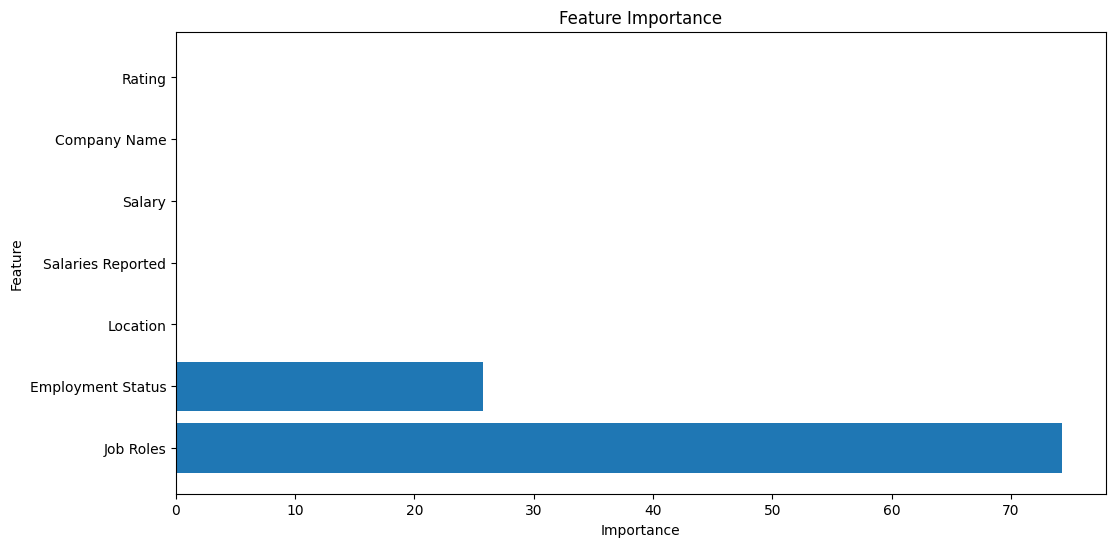

In [12]:
# If there are any categorical features, convert them to string type for CatBoost
categorical_features = new_df.select_dtypes(include=['object']).columns
new_df[categorical_features] = new_df[categorical_features].astype(str)

# Encode the target variable if it's categorical
label_encoder = LabelEncoder()
new_df['Job Title'] = label_encoder.fit_transform(new_df['Job Title'])

# Splitting the dataset into training and testing sets
X = new_df.drop('Job Title', axis=1)
y = new_df['Job Title']
# Threshold for minimum instances
threshold = 3

# Grouping sparse classes into 'other'
new_df['Job Title'] = np.where(new_df['Job Title'].map(new_df['Job Title'].value_counts()) < threshold, 'other', new_df['Job Title'])

# Re-encode the target variable
label_encoder = LabelEncoder()
new_df['Job Title'] = label_encoder.fit_transform(new_df['Job Title'])

# Splitting the dataset again
X = new_df.drop('Job Title', axis=1)
y = new_df['Job Title']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize CatBoost Classifier without specifying cat_features
model = CatBoostClassifier(iterations=100, learning_rate=1, depth=2, verbose=True)

# Fit model
model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Feature Importance
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Plotting Feature Importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
